# Feature Selection

In [38]:
# create dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

print(X.shape, y.shape)

(1000, 10) (1000,)


In [39]:
X

array([[-0.05935747, -0.81075922, -1.46291185, ..., -0.71333492,
        -0.38779067,  0.30975536],
       [ 1.35040799,  4.22073174,  1.56416182, ..., -1.35261676,
         0.56164546,  3.05553349],
       [ 1.06995768,  3.02959431, -2.68448393, ...,  1.67460575,
         1.4897756 ,  0.03734801],
       ...,
       [ 1.32117879,  3.00727694,  0.242322  , ..., -0.802865  ,
         0.67092995,  2.27887143],
       [-0.52716176,  0.70840414, -1.69716553, ..., -0.58513067,
        -0.57348277, -0.17506291],
       [-1.72169116, -0.78642113, -1.12858852, ...,  2.46859264,
        -0.00922643, -2.81226403]])

# Create a model

In [40]:
# We start with a random forest model, here we can evaluate
# the importance of each feature in the dataset.
# We can use the feature importance scores to select those features

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importance = rf.feature_importances_




In [41]:
importance

array([0.04150628, 0.09891617, 0.0603883 , 0.27042094, 0.12803106,
       0.07157635, 0.07179852, 0.1318597 , 0.04484533, 0.08065736])

Feature: 0, Score: 0.04151
Feature: 1, Score: 0.09892
Feature: 2, Score: 0.06039
Feature: 3, Score: 0.27042
Feature: 4, Score: 0.12803
Feature: 5, Score: 0.07158
Feature: 6, Score: 0.07180
Feature: 7, Score: 0.13186
Feature: 8, Score: 0.04485
Feature: 9, Score: 0.08066


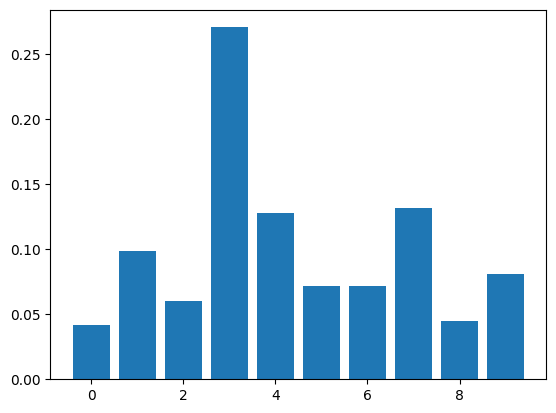

In [42]:
from matplotlib import pyplot as plt

# Print the feature performance prettier
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Creating a model fromm the best features

In [43]:
from sklearn.feature_selection import SelectFromModel

#write a function that selects the most important feature
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42, max_features=5))
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    #print
    print('X_train_fs: ', X_train_fs.shape, 'X_train: ',X_train.shape)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    #print
    print('X_test_fs: ', X_test_fs.shape,'X_test: ', X_test.shape)
    return X_train_fs, X_test_fs, fs

# run the function
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)



    

X_train_fs:  (700, 3) X_train:  (700, 10)
X_test_fs:  (300, 3) X_test:  (300, 10)


In [45]:
#classification report
from sklearn.metrics import classification_report

# fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_fs, y_train)
# evaluate the model
y_pred = rf.predict(X_test_fs)
# classification report
report = classification_report(y_test, y_pred)
# print
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       144
           1       0.90      0.90      0.90       156

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [46]:
# create and compare 3 different features from all the 10 features

rf_all_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all_features.fit(X_train, y_train)
y_pred_all_features = rf_all_features.predict(X_test)

# print
print(classification_report(y_test, y_pred_all_features))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       144
           1       0.95      0.93      0.94       156

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

